In [1]:
# Preparing where we were at the end of the last notebook
%matplotlib inline
import matplotlib.pyplot as plt
from htrc_features import FeatureReader
vol = FeatureReader('data/sample-file1.basic.json.bz2').first()

ERROR:root:Can't read data/sample-file1.basic.json.bz2. Did you pass the incorrect 'compressed=' argument?
Traceback (most recent call last):
  File "c:\users\organis2\documents\htrc-feature-reader\htrc_features\feature_reader.py", line 245, in _read_json
    f = bz2.BZ2File(filename_or_buffer)
  File "C:\Users\organis2\AppData\Local\Continuum\anaconda3\lib\site-packages\bz2file.py", line 107, in __init__
    self._fp = _builtin_open(filename, mode)
FileNotFoundError: [Errno 2] No such file or directory: 'data/sample-file1.basic.json.bz2'


FileNotFoundError: [Errno 2] No such file or directory: 'data/sample-file1.basic.json.bz2'

# More Features in the HTRC Extracted Features Dataset

So far we have mainly used token-counting features, accessed through `vol.tokenlist()`. The HTRC Extracted Features Dataset provides more features at the volume level. Here are other features that are available to Volume objects. Try them on `vol` and see what the output is:

- `vol.line_counts()`: How many vertically spaced lines of text, a measure related to the phyical format of the page.
- `vol.sentence_counts()`: How many sentences of text: a measure related to the content on a page.
- `vol.empty_line_counts()`: How many larger vertical spaces (empty lines of text) are there on the page between lines of text? In many cases, this can be used as a proxy for paragraph count. This is based on what software was used to OCR so there are inconsistencies: not all scans in the HathiTrust are OCR'd identically.
- `vol.begin_line_chars()`, `vol.end_line_chars()`: The count of different characters along the left-most and right-most sides of a page. This can tell you about what kind of page it is: for example, a table of contents might have a lot of numbers or roman numerals at the end of each line

Learning how thse are valuable might require you to shift how you "see" a page of text.  Let's look at a page of text as an image and as a text file.  What do you see? What do you think the computer sees?  

Earlier, we saw that the number of words on a page gave some indication of whether it was a page of the story or a different kind of page (chapter, front matter, etc). We can see that line count is another contextual 'hint':

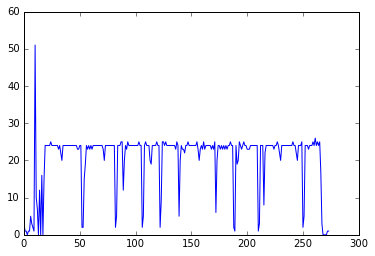

In [ ]:
line_counts = vol.line_counts()
plt.plot(line_counts)

The majority of pages have 20-25 lines, confirmable with a histogram: `plt.hist(line_counts)`. This is likely what a full page of text looks like in this book. A scholar trying to focus on patterns only in the text and comfortable missing a few short pages might choose to filter to just these pages.

## Page-Level Features

If you open the raw dataset file for a HTRC EF volume on your computer (TODO: provide a short snippt of this, also could we move this to be earlier?), you may notice that features are provided for each page. While this lesson has focused on volumes, most of the features that we have seen can be accessed for a single page; e.g. `Page.tokenlist()` instead of `Volume.tokenlist()`. The methods to access the features are named the same, with the exception that `line_count`, `empty_line_count`, and `sentence_count` are not pluralized.

Like iterating over `FeatureReader.volumes()` to get Volume objects, it is possible to iterate across pages with `Volume.pages()`.

# Next Steps

Now that you know the basics of the HTRC Feature Reader, you can learn more about the [Extracted Features dataset](https://analytics.hathitrust.org/features). The [Feature Reader home page](https://github.com/htrc/htrc-feature-reader/blob/master/README.ipynb) contains a lesson similar to this one but for more advanced users (that's you now!), and the [code documentation](http://htrc.github.io/htrc-feature-reader/htrc_features/feature_reader.m.html) gives exact information about what types of information can be called.

Underwood (2015) has released [genre classifications of public-domain texts in the HTRC EF Dataset](https://analytics.hathitrust.org/genre), comprised of fiction, poetry, and drama. Though many historians will be interested in other corners of the dataset, fiction is a good place to tinker with text mining ideas because of its expressiveness and relative format consistency.

Finally, the repository for the HTRC Feature Reader has [advanced tutorial notebooks](https://github.com/htrc/htrc-feature-reader/tree/master/examples) showing how to use the library further. One such tutorial shows how to [derive 'plot arcs' for a text](https://github.com/htrc/htrc-feature-reader/blob/master/examples/Within-Book%20Sentiment%20Trends.ipynb), a process popularized by Jockers (2015).

<img src="images/plot-arc.png" width="350px" alt="Plot Arc Example." />
**Figure: Plot Arc Example**

# References

Boris Capitanu, Ted Underwood, Peter Organisciak, Timothy Cole, Maria Janina Sarol, J. Stephen Downie (2016). The HathiTrust Research Center Extracted Feature Dataset (1.0) [Dataset]. HathiTrust Research Center, https://dx.doi.org/10.13012/J8X63JT3.

Chris Forster. "A Walk Through the Metadata: Gender in the HathiTrust Dataset." Blog. http://cforster.com/2015/09/gender-in-hathitrust-dataset/.

Matthew L. Jockers (Feb 2015). "Revealing Sentiment and Plot Arcs with the Syuzhet Package". *Matthew L. Jockers*. Blog. http://www.matthewjockers.net/2015/02/02/syuzhet/.

Peter Organisciak, Loretta Auvil, J. Stephen Downie (2015). “Remembering books: A within-book topic mapping technique.” Digital Humanities 2015. Sydney, Australia.

Stéfan Sinclair & Geoffrey Rockwell (2016). "The Art of Literary Text Analysis." Github.com. Commit b04bc18. https://github.com/sgsinclair/alta.

William J. Turkel and Adam Crymble (2012). "Counting Word Frequencies with Python". The Programming Historian. http://programminghistorian.org/lessons/counting-frequencies.

Ted Underwood (2014): Understanding Genre in a Collection of a Million Volumes, Interim Report. figshare.
https://dx.doi.org/10.6084/m9.figshare.1281251.v1.

Ted Underwood, Boris Capitanu, Peter Organisciak, Sayan Bhattacharyya, Loretta Auvil, Colleen Fallaw, J. Stephen Downie (2015). "Word Frequencies in English-Language Literature, 1700-1922" (0.2) [Dataset]. *HathiTrust Research Center*. https://dx.doi.org/10.13012/J8JW8BSJ.

Hadley Wickham (2011). "The split-apply-combine strategy for data analysis". *Journal of Statistical Software*, 40(1), 1-29.